<a href="https://colab.research.google.com/github/LucasHenrique-dev/projeto-QTS/blob/main/desenvolvimento/GeradrorQTS_entregaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importar Bibliotecas

In [1]:
import time
import random
import math
import sys
import json
import matplotlib.pyplot as plt
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Importar Informações

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id1 = '1b4NAPPCBU3z-ECLojeFbrw2-sWRKLCtU' #<-- You add in here the id from you google drive file, you can find it
file_id2 = '1V786MTeKHG_Kl2tJ4UuonczVD3IbYszI' #<-- You add in here the id from you google drive file, you can find it


download1 = drive.CreateFile({'id': file_id1})
download2 = drive.CreateFile({'id': file_id2})


# Download the file to a local disc
download1.GetContentFile('estrutura_curso.json')
download2.GetContentFile('estrutura_horario.json')

##Explorar Dados do Curso

In [3]:
arquivo_horario = open('/content/estrutura_horario.json')
estrutura_horario = json.load(arquivo_horario)

print(json.dumps(estrutura_horario, indent=4, ensure_ascii=False))

{
    "horario_inicio": "7:00",
    "horario_fim": "18:00",
    "almoco": {
        "inicio": "12:00",
        "fim": "13:00"
    },
    "duracao_hora_aula": 1,
    "intervalo_minutos_entre_aulas": 10,
    "dias_semana": [
        "Segunda",
        "Terça",
        "Quarta",
        "Quinta",
        "Sexta"
    ]
}


In [4]:
arquivo_curso = open('/content/estrutura_curso.json')
curso = json.load(arquivo_curso)

print(json.dumps(curso, indent=4, ensure_ascii=False))

{
    "quantidade_turmas": 5,
    "maximo_aulas_dia": 2,
    "disciplinas": {
        "SO": {
            "nome": "Sistemas Operacionais",
            "restrição_horario": "livre"
        },
        "MF": {
            "nome": "Métodos Formais",
            "restrição_horario": "livre"
        },
        "OC": {
            "nome": "Organização de Computadores",
            "restrição_horario": "livre"
        },
        "CO": {
            "nome": "Compiladores",
            "restrição_horario": "livre"
        },
        "IA": {
            "nome": "Inteligência Artificial",
            "restrição_horario": "07:00 - 12:00"
        }
    }
}


In [5]:
disciplinas = {0: ('NA', 'Horário Vago')}

for index, disciplina in enumerate(curso["disciplinas"].items()):
  disciplinas[index+1] = (disciplina[0], disciplina[1]["nome"])

disciplinas

{0: ('NA', 'Horário Vago'),
 1: ('SO', 'Sistemas Operacionais'),
 2: ('MF', 'Métodos Formais'),
 3: ('OC', 'Organização de Computadores'),
 4: ('CO', 'Compiladores'),
 5: ('IA', 'Inteligência Artificial')}

## Funções e Variáveis Auxiliares

In [6]:
def converter_minutos(hora):
  t = time.strptime(hora, '%H:%M')
  minutos = t[3] * 60 + t[4]
  return minutos

In [7]:
def calcular_disciplinas_dia(estrutura_horario, segmentacao_horario):
  inicio_aula, fim_aula = estrutura_horario['horario_inicio'], estrutura_horario['horario_fim']
  inicio_almoco, fim_almoco = estrutura_horario['almoco']['inicio'], estrutura_horario['almoco']['fim']
  duracao_dia = converter_minutos(fim_aula) - converter_minutos(inicio_aula)
  intervalo_almoco = converter_minutos(fim_almoco) - converter_minutos(inicio_almoco)
  return ((duracao_dia - intervalo_almoco) // segmentacao_horario) + 1

In [8]:
dias_semana = estrutura_horario["dias_semana"]
dias_semana

['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']

## Objetivos e Restrições do Sistema

O algoritmo visa montar um quadro de trabalho semanal (QTS) que otimize certos aspectos

- Objetivos:
  - Menor Tempo de Espera Entre Aulas: horário de aula vaga entre aulas da mesma disciplina

Além disso, deverá respeitar certas restrições

- Restrições:
  - Restrição Temporal: determinada aula precisa ser lecionada em um intervalo de tempo específico
  - Aulas Conjuntas: disciplinas devem ser lecionadas em forma de grupos. Ex.: 2 aulas seguidas da disciplina A, 3 aulas seguidas da disciplina B, etc
  - Intervalos: existe um intervalo pre definido para almoço, além disso após aulas deve haver intervalos também definidos


## Funções de Avaliação

### Avaliar Objetivos

#### OBJETIVO 1: TEMPO DE OCIOSIDADE ENTRE AULAS DE MESMA DISCIPLINA

In [9]:
def calcular_horas_vagas(aulas):
  disciplinas = set(aulas);
  aula_vaga = 0

  for disciplina in disciplinas:
    if disciplina == 0:                                                         #Ignora aulas vagas
      continue

    aula_atual = proxima_aula = 0
    while aulas[proxima_aula:].count(disciplina) > 1:                           #Calcula horas vagas de uma disciplina
      # print("Aula Atual: ", aula_atual, "     Proxima Aula: ", proxima_aula)
      aula_atual = aulas.index(disciplina, proxima_aula)
      proxima_aula = aulas.index(disciplina, aula_atual+1)

      aula_vaga += proxima_aula - (aula_atual + 1)

  return aula_vaga

In [10]:
calcular_horas_vagas([2, 0, 2, 2, 0])

1

### Avaliar Restrições

#### RESTRIÇÃO 3: Intervalo de Almoço

Analisa-se a possibilidade da hora do almoço estar entre aulas de uma mesma disciplina

In [11]:
def calcular_restricao_3(aulas):
  if aulas[gene_almoco - 1] == aulas[gene_almoco]:
    return 1
  return 0

##Definir Cromossomo

Definir a sequência genética de formação de um cromossomo

Os genes determinam aspectos de um indivíduo e o cromossomo é o conjunto dessas características o qual forma o indivíduo (possível solução do problema)

O cromossomo está estruturado da seguinte forma:
- turma -> dias da semana -> disciplinas
- Não há divisão física entre os dados, eles são sequenciais
- As informações indicadas no primeiro tópico se repetem N vezes onde N indica o número de turmas

[Turma1:(Segunda:(..disciplinas), Terça:(..disciplinas), Quarta:(..disciplinas), Quinta:(..disciplinas), Sexta:(..disciplinas)), Turma2:(Segunda:(..disciplinas), Terça:(..disciplinas), Quarta:(..disciplinas), Quinta:(..disciplinas), Sexta:(..disciplinas))..]

Ex.: [(SO,SO,SO,SO,MF,MF), (MF,MF,OC,OC,OC,OC), (CO,CO,CO,CO,IA,IA), (IA,IA,NA,NA,NA,NA), (NA,NA,NA,NA,NA,NA),</br>
(SO,SO,SO,SO,MF,MF), (MF,MF,OC,OC,OC,OC), (CO,CO,CO,CO,IA,IA), (IA,IA,NA,NA,NA,NA), (NA,NA,NA,NA,NA,NA)]

In [12]:
hora_aula = estrutura_horario["duracao_hora_aula"] * 60
intervalo_aula = estrutura_horario["intervalo_minutos_entre_aulas"]

segmentacao_horario = hora_aula + intervalo_aula                                   # Divisão do horário no QTS (minutos)
espacos_totais = calcular_disciplinas_dia(estrutura_horario, segmentacao_horario)  # Retorna quantidade de sessões destinadas às disciplinas pela manhã

In [13]:
espacos_totais

9

Para melhor atender a restrição do horário de almoço houve o desconto das horas de intervalo. A sua posição no gene é calculada abaixo a fim de ser acrescentado posteriormente na solução


In [14]:
inicio_aula = converter_minutos(estrutura_horario['horario_inicio'])
inicio_almoco = converter_minutos(estrutura_horario['almoco']['inicio'])
aulas_manha = (((inicio_almoco - inicio_aula) // segmentacao_horario) + 1) // curso["maximo_aulas_dia"]
gene_almoco = aulas_manha                                                       # Gene inicial é o zero!
gene_almoco

2

Para melhor atender a restrição das aulas conjuntas cada instância de aula representará um conjunto de aulas. Por exemplo, aparencendo uma instância da aula "1" ela representa um grupo de N aulas da aula "1", seguidas.

In [15]:
disciplinas_dia = espacos_totais // curso["maximo_aulas_dia"]
disciplinas_dia

4

## Criar o Domínio de Variação dos Genes

In [16]:
dominio = [(0, len(disciplinas)-1)] * (curso["quantidade_turmas"] * len(dias_semana) * disciplinas_dia)
print(f'Domínio: {dominio}\nElementos: {len(dominio)}')

Domínio: [(0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5), (0, 5)]
Elementos: 100


## Gerar Cromossomo


In [17]:
def gerar_cromossomo(turmas=curso['quantidade_turmas'], qtd_dias_semana=len(dias_semana), disciplinas_dia=disciplinas_dia, dominio=dominio[0]):
  tamanho_cromossomo = turmas * qtd_dias_semana * disciplinas_dia
  cromossomo = []

  for i in range(tamanho_cromossomo):
    cromossomo += [random.randint(dominio[0], dominio[1])]

  return cromossomo

In [18]:
cromossomo = gerar_cromossomo()
print(cromossomo, "\nTamanho:", len(cromossomo))

[5, 2, 3, 2, 3, 1, 2, 3, 5, 2, 3, 4, 3, 5, 1, 1, 0, 2, 4, 5, 0, 0, 1, 0, 1, 2, 2, 5, 2, 3, 0, 5, 3, 2, 5, 1, 3, 5, 1, 0, 5, 4, 0, 0, 2, 2, 1, 3, 1, 5, 5, 5, 4, 5, 5, 1, 3, 2, 0, 0, 3, 2, 1, 3, 2, 2, 3, 4, 0, 5, 4, 1, 0, 2, 3, 1, 2, 2, 4, 3, 2, 1, 5, 1, 3, 5, 5, 4, 3, 0, 3, 1, 0, 2, 3, 4, 3, 2, 0, 2] 
Tamanho: 100


In [19]:
cromossomo = gerar_cromossomo(1, 4, 2)
print(cromossomo, "\nTamanho:", len(cromossomo))

[2, 4, 0, 0, 3, 4, 3, 1] 
Tamanho: 8


# Função de Avaliação (Fitness Function)
Algoritmo que atribui pontuação ao indivíduo gerado (possível solução) baseada no objetivo estabelecido e critérios do sistema

A implementação da função de fitness penaliza os QTS que infrinjem restrições

Critérios:
- Objetivo
  - Minimizar tempo de ociosadade entre aulas de mesma disciplina
- Restrições
  - Restrição Temporal
  - Aulas conjuntas
  - Intervalos

### Objetivos

O cromossomo será avaliado de forma que minimizações da ociosidade possuem uma pontuação menor associada

In [20]:
# Objetivo(x) = constante * desvio
constante_objetivo = 10
def avaliar_objetivos(aulas_dia):
  desvio = 0

  desvio += calcular_horas_vagas(aulas_dia)                                     #Objetivo 1
  
  return constante_objetivo * desvio

### Restrições

A cada quebra de restrição o cromossomo é penalizado com acréscimo de sua pontuação. A pontuação atribuída é maior em relação ao objetivo

In [21]:
# Penalidade(x) = constante * desvio
def aplicar_penalidades(aulas_dia):
  desvio, constante = 0, 100
  
  desvio += calcular_restricao_3(aulas_dia)                                     #Restrição 3
  
  return constante * desvio

###Fitness Function

In [22]:
def funcao_avaliacao(calendario):
  pontuacao = 0

  for i in range(0, len(calendario), disciplinas_dia):
    aulas_dia = calendario[i:i+disciplinas_dia]

    pontuacao += avaliar_objetivos(aulas_dia)                                   #Pontuar pelo nível de cumprimento dos objetivos
    pontuacao += aplicar_penalidades(aulas_dia)                                 #Penalizar descumprimento das restrições
  
  return pontuacao

In [23]:
funcao_avaliacao([1,1,0,0, 2,4,5,1, 4,1,1,4, 2,2,5,5, 0,3,0,5,
                  1,1,0,0, 2,4,5,1, 4,1,4,4, 2,2,5,5, 0,3,0,5])

130

# Impressão de Quadro de Trabalho Semanal

In [24]:
def imprimir_qts(calendario):
  dia_id = 0
  espera_total = 0
  qtd_dias_semana = len(dias_semana)

  for i in range(curso["quantidade_turmas"]):
    print(f"\n{i+1}ª Turma:")
    inicio_turma = i*(disciplinas_dia*qtd_dias_semana)
    for j in range(qtd_dias_semana):
        dia = dias_semana[j]
        comeco_semana = inicio_turma + j*disciplinas_dia
        
        disciplinas_semana = calendario[comeco_semana:comeco_semana+disciplinas_dia]                            # coleta as disciplinas da semana
        expandir_grupos = [info for aula in disciplinas_semana for info in [aula] * curso["maximo_aulas_dia"]]  # expõem a quantidade real de aulas
        decodificar_disciplinas = [disciplinas[disciplina][0] for disciplina in expandir_grupos]                # traduz números em disciplinas

        decodificar_disciplinas.insert(gene_almoco * curso["maximo_aulas_dia"], "Almoço")                       # inserção do horário de almoço

        dia_id += 1                                                                                             # próximo dia da semana
        print(f'|{dia:7}| {", ".join(decodificar_disciplinas)}|')
        
        espera_total += (avaliar_objetivos(disciplinas_semana) // constante_objetivo) * curso["maximo_aulas_dia"]

  print(f'\nTempo Total de Espera Entre Aulas: {espera_total} {"Horas" if espera_total != 1 else "Hora"}')

In [25]:
individuo = gerar_cromossomo()
print(individuo)
imprimir_qts(individuo)

[1, 0, 3, 1, 4, 2, 0, 1, 0, 5, 4, 2, 0, 4, 2, 5, 3, 0, 1, 0, 0, 0, 4, 0, 3, 1, 5, 2, 1, 0, 0, 0, 2, 3, 4, 3, 2, 4, 4, 3, 4, 1, 4, 3, 1, 5, 4, 5, 3, 1, 2, 3, 1, 0, 5, 5, 0, 3, 1, 1, 4, 4, 3, 3, 1, 2, 3, 3, 5, 4, 4, 3, 2, 2, 5, 2, 5, 2, 2, 1, 3, 4, 0, 1, 5, 4, 0, 3, 5, 5, 5, 4, 5, 4, 0, 4, 4, 3, 4, 2]

1ª Turma:
|Segunda| SO, SO, NA, NA, Almoço, OC, OC, SO, SO|
|Terça  | CO, CO, MF, MF, Almoço, NA, NA, SO, SO|
|Quarta | NA, NA, IA, IA, Almoço, CO, CO, MF, MF|
|Quinta | NA, NA, CO, CO, Almoço, MF, MF, IA, IA|
|Sexta  | OC, OC, NA, NA, Almoço, SO, SO, NA, NA|

2ª Turma:
|Segunda| NA, NA, NA, NA, Almoço, CO, CO, NA, NA|
|Terça  | OC, OC, SO, SO, Almoço, IA, IA, MF, MF|
|Quarta | SO, SO, NA, NA, Almoço, NA, NA, NA, NA|
|Quinta | MF, MF, OC, OC, Almoço, CO, CO, OC, OC|
|Sexta  | MF, MF, CO, CO, Almoço, CO, CO, OC, OC|

3ª Turma:
|Segunda| CO, CO, SO, SO, Almoço, CO, CO, OC, OC|
|Terça  | SO, SO, IA, IA, Almoço, CO, CO, IA, IA|
|Quarta | OC, OC, SO, SO, Almoço, MF, MF, OC, OC|
|Quinta | SO, SO

In [26]:
imprimir_qts([1,2,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,0, 1,1,1,1,
              1,1,1,1, 2,2,2,2, 3,3,3,3, 5,0,1,2, 2,2,2,2,
              1,1,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,4, 5,5,5,5,
              1,1,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,4, 0,0,0,0,
              1,1,1,1, 2,2,2,2, 3,3,3,3, 4,4,4,4, 3,3,3,3])


1ª Turma:
|Segunda| SO, SO, MF, MF, Almoço, SO, SO, SO, SO|
|Terça  | MF, MF, MF, MF, Almoço, MF, MF, MF, MF|
|Quarta | OC, OC, OC, OC, Almoço, OC, OC, OC, OC|
|Quinta | CO, CO, CO, CO, Almoço, CO, CO, NA, NA|
|Sexta  | SO, SO, SO, SO, Almoço, SO, SO, SO, SO|

2ª Turma:
|Segunda| SO, SO, SO, SO, Almoço, SO, SO, SO, SO|
|Terça  | MF, MF, MF, MF, Almoço, MF, MF, MF, MF|
|Quarta | OC, OC, OC, OC, Almoço, OC, OC, OC, OC|
|Quinta | IA, IA, NA, NA, Almoço, SO, SO, MF, MF|
|Sexta  | MF, MF, MF, MF, Almoço, MF, MF, MF, MF|

3ª Turma:
|Segunda| SO, SO, SO, SO, Almoço, SO, SO, SO, SO|
|Terça  | MF, MF, MF, MF, Almoço, MF, MF, MF, MF|
|Quarta | OC, OC, OC, OC, Almoço, OC, OC, OC, OC|
|Quinta | CO, CO, CO, CO, Almoço, CO, CO, CO, CO|
|Sexta  | IA, IA, IA, IA, Almoço, IA, IA, IA, IA|

4ª Turma:
|Segunda| SO, SO, SO, SO, Almoço, SO, SO, SO, SO|
|Terça  | MF, MF, MF, MF, Almoço, MF, MF, MF, MF|
|Quarta | OC, OC, OC, OC, Almoço, OC, OC, OC, OC|
|Quinta | CO, CO, CO, CO, Almoço, CO, CO, CO, CO|
|Sexta

# Mutação

In [27]:
def mutacao(passo, calendario, probabilidade, dominio = dominio):
  gene = random.randint(0, len(dominio) - 1)    #Escolha do gene que sofrerá a mutação
  mutante = calendario
  #print("Gene: ", gene)
  #Joga um número aleatório para verificar se haverá mutação.
  if random.random() < probabilidade:
    if calendario[gene] != dominio[gene][0]:    #Verifica borda inferior
      mutante = calendario[0:gene] + [calendario[gene] - passo] + calendario[gene + 1:]
    elif calendario[gene] != dominio[gene][1]:  #Verifica borda superior
      mutante = calendario[0:gene] + [calendario[gene] + passo] + calendario[gene + 1:]
  return mutante

In [28]:
print(mutacao(2, [2,2,2,2,2,2, 2,2,2,2,2,2, 2,2,2,2,2,2, 2,2,2,2,2,2, 2,2,2,2,2,2], 0.9, dominio[0:30]))

[2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Crossover

In [29]:
def crossover(individuo1, individuo2, dominio = dominio):
  gene = random.randint(1, len(dominio) - 2)
  #print(gene)
  return individuo1[0:gene] + individuo2[gene:]

In [30]:
s1 = [1,1,1,1,1,1, 1,1,1,1,1,1, 1,1,1,1,1,1, 1,1,1,1,1,1, 1,1,1,1,1,1]
s2 = [2,2,2,2,2,2, 2,2,2,2,2,2, 2,2,2,2,2,2, 2,2,2,2,2,2, 2,2,2,2,2,2]

In [31]:
print(crossover(s1, s2, dominio[0:30]))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Algoritmo Genético Completo

In [32]:
%matplotlib inline


def algoritmo_genetico(tamanho_populacao = 10, passo = 1, elitismo = 0.2,
                        numero_geracoes = 100, probabilidade_mutacao = 0.05, dominio = dominio):
    populacao = []
    for i in range(tamanho_populacao):
        #Cria aleatoriamente os indivíduos
        individuo = gerar_cromossomo()
        populacao.append(individuo)
    # print(populacao)
    # print(len(populacao))
    numero_elitismo = int(elitismo * tamanho_populacao)

    #print('Tamanho da população: ', len(populacao))

    melhor_fit = []#Guardar o melhor de cada interação

    for i in range(numero_geracoes):
        custos = [(funcao_avaliacao(individuo), individuo) for individuo in populacao]
        # print("A",custos)
        custos.sort()
        #print("B",custos)
        individuos_ordenados = [individuo for (custo, individuo) in custos]
        #print(individuos_ordenados)
        populacao = individuos_ordenados[0:numero_elitismo] # só pega o percentual dos elementos baseados no elisitmo
        
        while len(populacao) < tamanho_populacao:
            i1 = random.randint(0, numero_elitismo)
            i2 = random.randint(0, numero_elitismo)
            #print(i1, i2, individuos_ordenados[i1], individuos_ordenados[i2])
            novo_individuo = crossover(individuos_ordenados[i1], individuos_ordenados[i2])
            #print(novo_individuo)
            mutacao_novo_individuo = mutacao(passo, novo_individuo, probabilidade_mutacao)
            #print(novo_individuo)
            #print(mutacao_novo_individuo)
            #print()
            populacao.append(mutacao_novo_individuo)

        #print('Tamanho da população: ', len(populacao))
        melhor_fit.append(custos[0][0])
    #print(custos)
    
    # print(melhor_fit)
    #Plotar o gráfico
    plt.plot(melhor_fit);
    
    return custos[0][1]

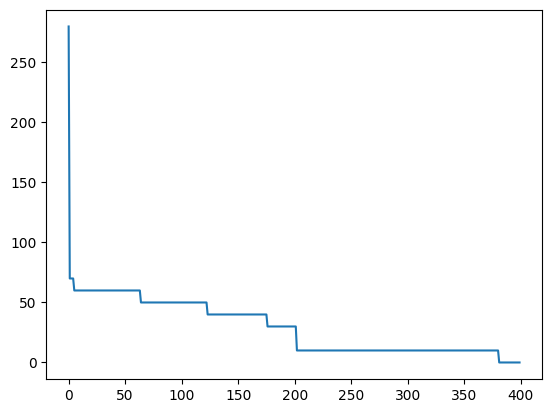

In [33]:
solucao = algoritmo_genetico(tamanho_populacao = 10, numero_geracoes= 400)

In [34]:
print(solucao)

[2, 0, 4, 4, 2, 2, 1, 0, 5, 3, 0, 0, 0, 2, 0, 3, 0, 0, 1, 3, 0, 2, 3, 3, 0, 5, 0, 3, 5, 0, 3, 3, 0, 3, 0, 4, 1, 0, 3, 3, 4, 0, 5, 0, 1, 3, 0, 0, 1, 0, 5, 3, 4, 4, 0, 3, 0, 0, 5, 3, 0, 0, 1, 3, 0, 0, 3, 0, 0, 3, 5, 0, 1, 0, 4, 0, 1, 1, 3, 0, 5, 1, 0, 0, 4, 3, 0, 2, 0, 1, 2, 3, 0, 2, 3, 1, 0, 2, 0, 4]


In [35]:
funcao_avaliacao(solucao)

0

In [36]:
imprimir_qts(solucao)


1ª Turma:
|Segunda| MF, MF, NA, NA, Almoço, CO, CO, CO, CO|
|Terça  | MF, MF, MF, MF, Almoço, SO, SO, NA, NA|
|Quarta | IA, IA, OC, OC, Almoço, NA, NA, NA, NA|
|Quinta | NA, NA, MF, MF, Almoço, NA, NA, OC, OC|
|Sexta  | NA, NA, NA, NA, Almoço, SO, SO, OC, OC|

2ª Turma:
|Segunda| NA, NA, MF, MF, Almoço, OC, OC, OC, OC|
|Terça  | NA, NA, IA, IA, Almoço, NA, NA, OC, OC|
|Quarta | IA, IA, NA, NA, Almoço, OC, OC, OC, OC|
|Quinta | NA, NA, OC, OC, Almoço, NA, NA, CO, CO|
|Sexta  | SO, SO, NA, NA, Almoço, OC, OC, OC, OC|

3ª Turma:
|Segunda| CO, CO, NA, NA, Almoço, IA, IA, NA, NA|
|Terça  | SO, SO, OC, OC, Almoço, NA, NA, NA, NA|
|Quarta | SO, SO, NA, NA, Almoço, IA, IA, OC, OC|
|Quinta | CO, CO, CO, CO, Almoço, NA, NA, OC, OC|
|Sexta  | NA, NA, NA, NA, Almoço, IA, IA, OC, OC|

4ª Turma:
|Segunda| NA, NA, NA, NA, Almoço, SO, SO, OC, OC|
|Terça  | NA, NA, NA, NA, Almoço, OC, OC, NA, NA|
|Quarta | NA, NA, OC, OC, Almoço, IA, IA, NA, NA|
|Quinta | SO, SO, NA, NA, Almoço, CO, CO, NA, NA|
|Sexta